In [165]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [166]:
#loading dataset
adult = pd.read_csv(r'C:\Users\USER1\Desktop\adult.csv')

In [167]:
#first 7 rows of the dataset
adult.head(7)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [168]:
#last 5 rows of the dataset
adult.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [169]:
#statistical description of the dataset
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [170]:
#statistical description of categorical columns of the dataset
adult.describe(include = 'object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [171]:
#checking  for nulll inputs
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [172]:
#dataset columns
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [173]:
#replacing unwanted characters
adult[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income']] = adult[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income']].replace('?', np.NaN)

In [174]:
#checking for null values
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

<AxesSubplot:>

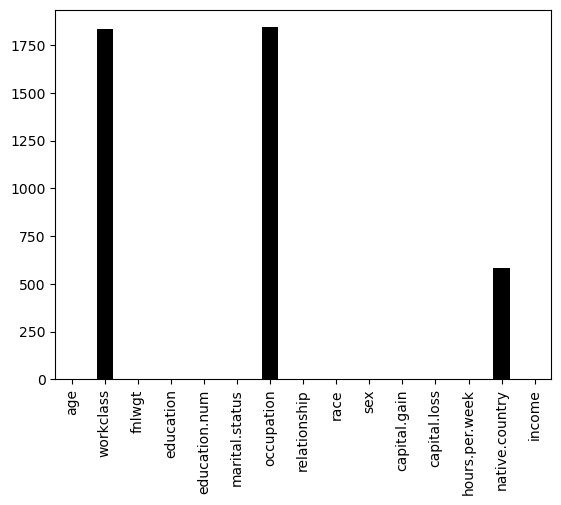

In [175]:
#showing a plot of null values in the dataset
adult.isnull().sum().plot(kind = 'bar', color ='k')

In [176]:
#Dropping Null values
adult_c = adult.dropna()

In [177]:
#checking for null values
adult_c.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

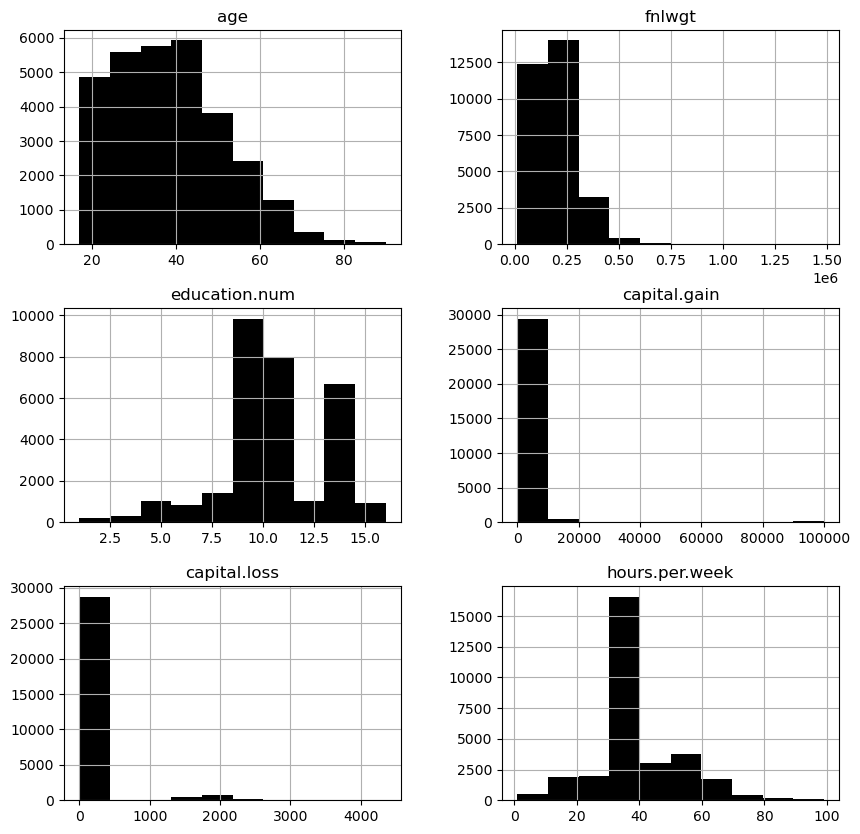

In [178]:
#showing a distribution of numerical columns in the dataset
adult_c.hist(figsize = (10,10), color = 'k')

<AxesSubplot:>

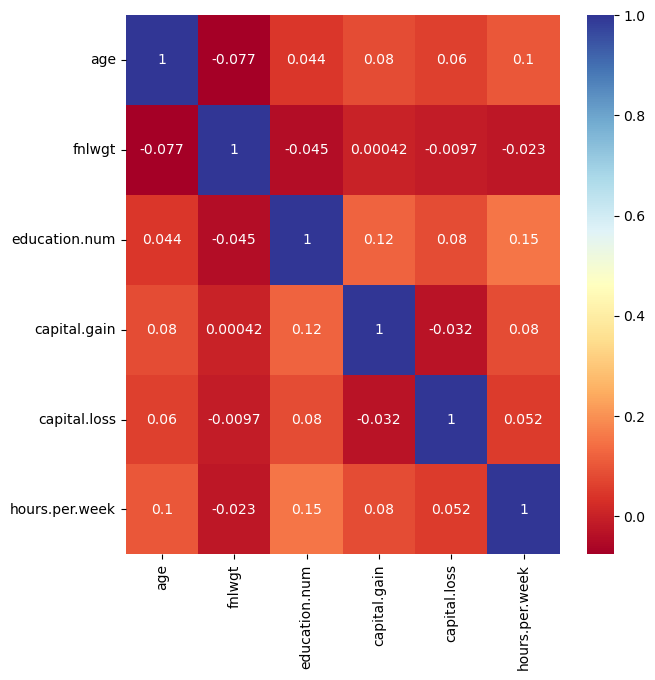

In [179]:
#showing a heatmap of the correlation between numerical columns in the dataset
plt.figure(figsize = (7,7))
sns.heatmap(adult_c.corr(), annot = True, cmap = 'RdYlBu')

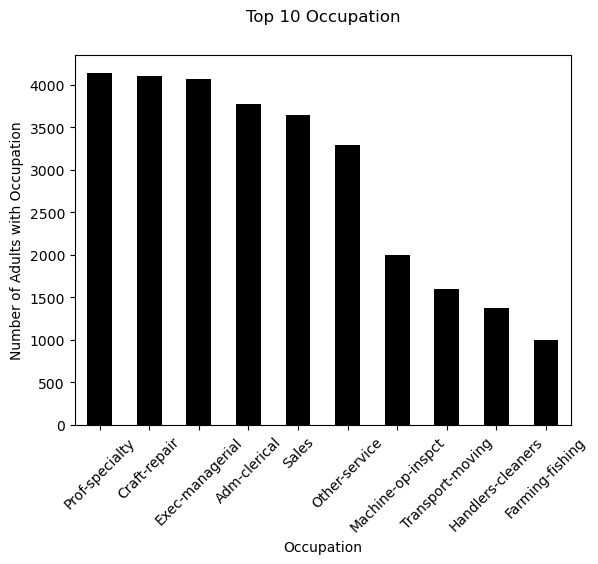

In [180]:
#showing a plot of the top 10 occupations
adult.occupation.value_counts()[:10].plot(kind='bar', color ='k')
plt.title('Top 10 Occupation', y=1.07)
plt.xlabel('Occupation')
plt.ylabel('Number of Adults with Occupation')
plt.xticks(rotation = 45)
plt.show()

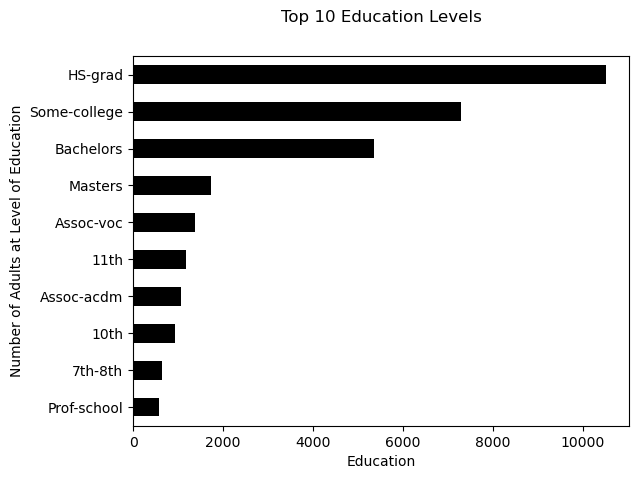

In [181]:
#showing a countplot of the top 10 educational levels
adult.education.value_counts()[:10].sort_values().plot(kind='barh', color ='k')
plt.title('Top 10 Education Levels', y=1.07)
plt.xlabel('Education')
plt.ylabel('Number of Adults at Level of Education')
plt.show()

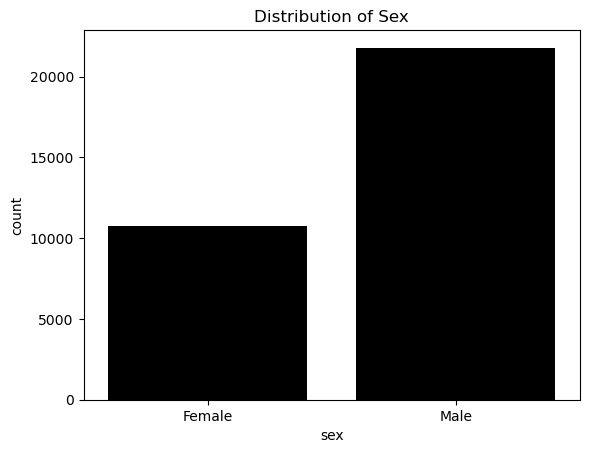

In [182]:
# showing a countplotof the distribution of sex
sns.countplot(x=adult.sex, color='k')
plt.title('Distribution of Sex')
plt.show()

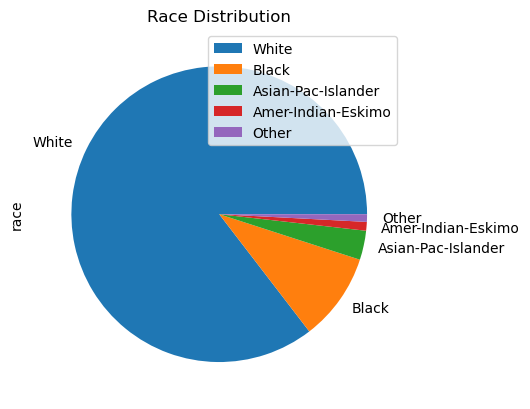

In [183]:
#showing a chart of race distribution
adult.race.value_counts().plot(kind='pie',labels=adult.race.value_counts().index)
plt.legend()
plt.title('Race Distribution')
plt.show()

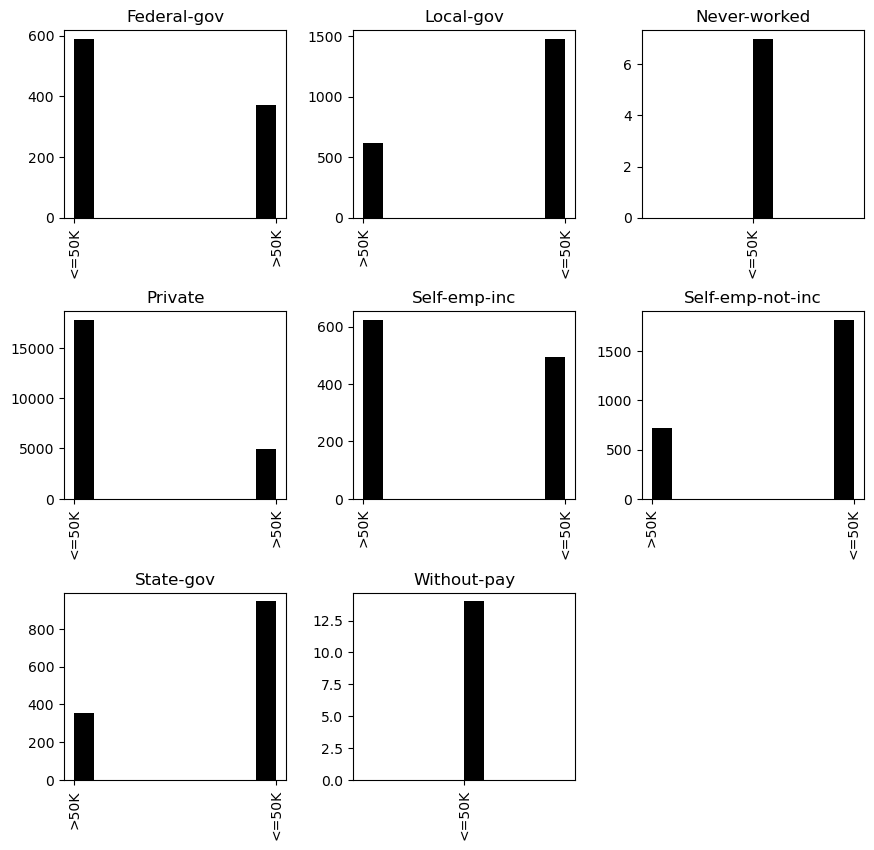

In [184]:
#showing an analysis of imcome grouped by workclass
adult.hist('income', by='workclass',color = 'k', figsize =( 10,10));
plt.show()

In [185]:
#changing type of columns
adult['marital.status'].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse'],[1,2,3,4,5,6,7], inplace=True)
adult.relationship.replace(['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'],[1,2,3,4,5,6],inplace=True)
adult.race.replace(['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],[1,2,3,4,5], inplace=True)
adult.sex.replace(['Male','Female'],[1,2], inplace=True)

In [186]:
#showimg information about dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  int64 
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  int64 
 8   race            32561 non-null  int64 
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(10), object(5)
memory usage: 3.7+ MB


In [187]:
#dropping columns
adult_cc=adult.drop(['workclass','education','occupation','native.country'], axis =1)
adult_cc

,age,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,5,2,1,2,0,4356,40,<=50K
1,82,132870,9,5,2,1,2,0,4356,18,<=50K
2,66,186061,10,5,4,2,2,0,4356,40,<=50K
3,54,140359,4,3,4,1,2,0,3900,40,<=50K
4,41,264663,10,4,3,1,2,0,3900,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,2,2,1,1,0,0,40,<=50K
32557,27,257302,12,1,5,1,2,0,0,38,<=50K
32558,40,154374,9,1,1,1,1,0,0,40,>50K
32559,58,151910,9,5,4,1,2,0,0,40,<=50K


In [188]:
chart = adult_c.income.value_counts()
chart

<=50K    22654
>50K      7508
Name: income, dtype: int64

<AxesSubplot:>

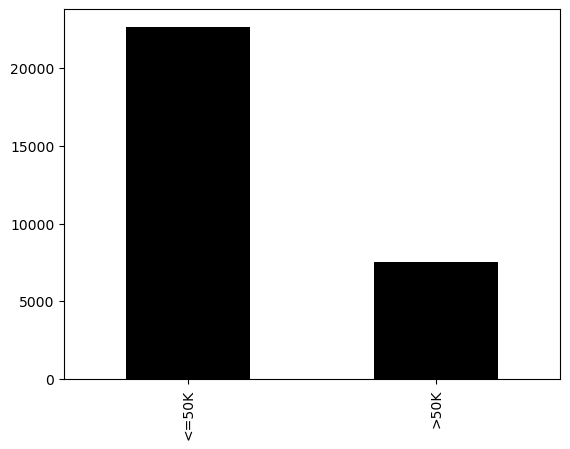

In [189]:
#Showing a plot of income value counts
chart.plot(kind='bar', color ='k')

In [190]:
x = adult_cc.drop('income', axis =1)
x

,age,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,90,77053,9,5,2,1,2,0,4356,40
1,82,132870,9,5,2,1,2,0,4356,18
2,66,186061,10,5,4,2,2,0,4356,40
3,54,140359,4,3,4,1,2,0,3900,40
4,41,264663,10,4,3,1,2,0,3900,40
...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,2,2,1,1,0,0,40
32557,27,257302,12,1,5,1,2,0,0,38
32558,40,154374,9,1,1,1,1,0,0,40
32559,58,151910,9,5,4,1,2,0,0,40


In [191]:
y= adult_cc.income
y.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8    <=50K
9     >50K
Name: income, dtype: object

In [192]:
#splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 7 )

In [193]:
R_f = RandomForestClassifier(n_estimators=200)

In [194]:
R_f.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [195]:
R_f.score(x_train,y_train)

0.9993473587223587

In [196]:
y_pred = R_f.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
print(f'Accuracy :{round(acc_score * 100, 2)}%')
precision = precision_score(y_test,y_pred, pos_label ='<=50K')
print(f'Precision :{round(precision * 100, 2)}%')
recall = recall_score(y_test, y_pred, pos_label ='<=50K')
print(f'Recall :{round(recall * 100, 2)}%')
f1 = f1_score(y_test, y_pred, pos_label ='<=50K')
print(f'F1_score :{round(f1 * 100, 2)}%')

Accuracy :84.39%
Precision :88.12%
Recall :91.9%
F1_score :89.97%


In [197]:
print(confusion_matrix(y_test,y_pred))

[[4562  402]
 [ 615  934]]


<AxesSubplot:>

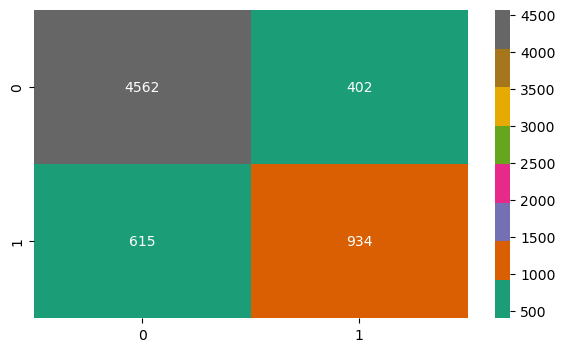

In [198]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,4))
sns.heatmap(cm,annot=True,fmt ='d', cmap='Dark2')

In [199]:
dtree = DecisionTreeClassifier()

In [200]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [201]:
pred= dtree.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print(f'Accuracy :{round(acc_score * 100, 2)}%')
precision = precision_score(y_test,pred, pos_label ='<=50K')
print(f'Precision :{round(precision * 100, 2)}%')
recall = recall_score(y_test, pred, pos_label ='<=50K')
print(f'Recall :{round(recall * 100, 2)}%')
f1 = f1_score(y_test, pred, pos_label ='<=50K')
print(f'F1_score :{round(f1 * 100, 2)}%')

Accuracy :81.25%
Precision :87.83%
Recall :87.53%
F1_score :87.68%


In [202]:
print(confusion_matrix(y_test,pred))

[[4345  619]
 [ 602  947]]


<AxesSubplot:>

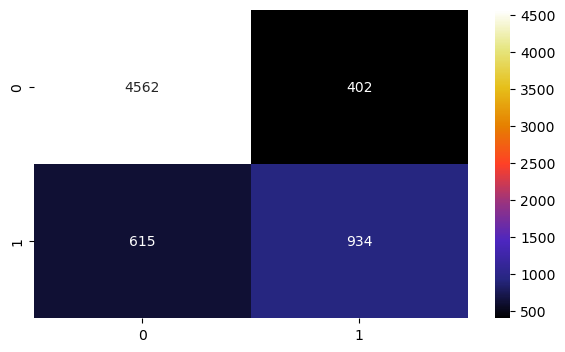

In [203]:
cm_dtree = confusion_matrix(y_test,pred)
plt.figure(figsize=(7,4))
sns.heatmap(cm,annot=True,fmt ='d', cmap='CMRmap')

In [204]:
svc_model = SVC()

In [205]:
svc_model.fit(x_train,y_train)

SVC()

In [206]:
svc_pred = svc_model.predict(x_test)
acc_score = accuracy_score(y_test,svc_pred)
print(f'Accuracy :{round(acc_score * 100, 2)}%')
precision = precision_score(y_test,svc_pred, pos_label ='<=50K')
print(f'Precision :{round(precision * 100, 2)}%')
recall = recall_score(y_test, svc_pred, pos_label ='<=50K')
print(f'Recall :{round(recall * 100, 2)}%')
f1 = f1_score(y_test, svc_pred, pos_label ='<=50K')
print(f'F1_score :{round(f1 * 100, 2)}%')

Accuracy :79.89%
Precision :79.19%
Recall :99.84%
F1_score :88.33%


In [207]:
print(confusion_matrix(y_test,svc_pred))

[[4956    8]
 [1302  247]]


<AxesSubplot:>

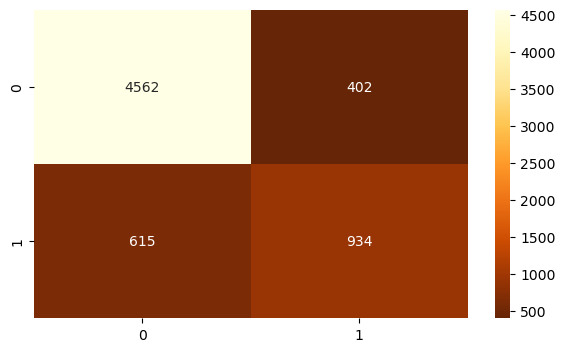

In [208]:
cm_svc = confusion_matrix(y_test,pred)
plt.figure(figsize=(7,4))
sns.heatmap(cm,annot=True,fmt ='d', cmap='YlOrBr_r')

In [209]:
acc_score = accuracy_score(y_test,y_pred)
print(f'Accuracy(Random Forest) :{round(acc_score * 100, 2)}%')
acc_score = accuracy_score(y_test,pred)
print(f'Accuracy(Decision Tree) :{round(acc_score * 100, 2)}%')
acc_score = accuracy_score(y_test,svc_pred)
print(f'Accuracy(SVC) :{round(acc_score * 100, 2)}%')

Accuracy(Random Forest) :84.39%
Accuracy(Decision Tree) :81.25%
Accuracy(SVC) :79.89%


In [210]:
fi =R_f.feature_importances_
fi

array([0.15809846, 0.25329821, 0.12574546, 0.10945016, 0.08090672,
       0.01603966, 0.00837431, 0.1197349 , 0.03897546, 0.08937667])

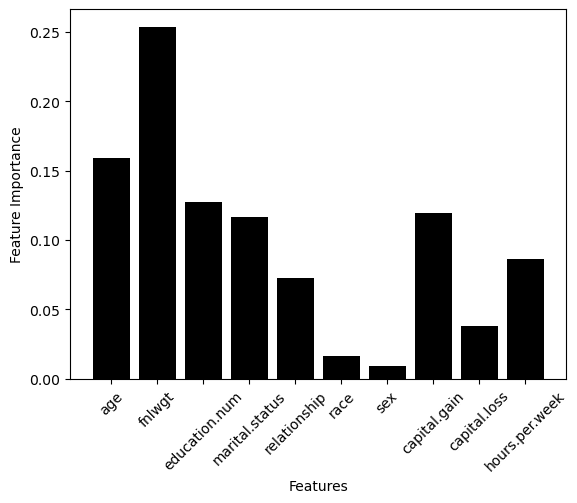

In [217]:
fig = plt.figure()
features = ['age','fnlwgt','education.num','marital.status','relationship','race','sex','capital.gain','capital.loss','hours.per.week']
feature_importance =[0.15918802, 0.2536514 , 0.12778845, 0.11698187, 0.07301086,0.01658141, 0.00929375, 0.11953366, 0.03781922, 0.08615136]
plt.bar(features,feature_importance,color='k')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation = 45)
plt.show()

In [212]:
saved_model = pickle.dumps(R_f)
R_f_from_pickle = pickle.loads(saved_model)
R_f_from_pickle.predict(x_test)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '>50K'],
      dtype=object)

In [213]:
adult_cc.head()

,age,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,5,2,1,2,0,4356,40,<=50K
1,82,132870,9,5,2,1,2,0,4356,18,<=50K
2,66,186061,10,5,4,2,2,0,4356,40,<=50K
3,54,140359,4,3,4,1,2,0,3900,40,<=50K
4,41,264663,10,4,3,1,2,0,3900,40,<=50K


In [214]:
R_f.predict([[82,132870,9,5,2,1,2,0,4356,18]]) #2nd entry

array(['<=50K'], dtype=object)

In [215]:
adult_cc.tail()

,age,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
32556,22,310152,10,2,2,1,1,0,0,40,<=50K
32557,27,257302,12,1,5,1,2,0,0,38,<=50K
32558,40,154374,9,1,1,1,1,0,0,40,>50K
32559,58,151910,9,5,4,1,2,0,0,40,<=50K
32560,22,201490,9,2,3,1,1,0,0,20,<=50K


In [216]:
R_f.predict([[40,154374,9,1,1,1,1,0,0,40]]) #32558 entry

array(['>50K'], dtype=object)